1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

# Bottle File

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modules for statistics
import math
import statistics
from scipy import stats

In [189]:
bottle_df = pd.read_csv("bottle.csv") 
bottle_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
len(bottle_df)

864863

In [80]:
print(bottle_df.describe())

             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587269     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.3600

# Check datatypes to see if there are any that need to be changed.

Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.

In [17]:
print(bottle_df.iloc[:, 47].dtypes) #objects
print(bottle_df.iloc[:, 73].dtypes) #objects

#bottle_df.iloc[:, 47] -->to see the name of the column
#bottle_df.iloc[:, 73] -->to see the name of the column

bottle_df['IncTim'].value_counts(dropna=False) #98% of the column contains NaNs. (REMOVED LATER)
bottle_df['DIC Quality Comment'].value_counts(dropna=False) #99% of column contains NaNs (REMOVED LATER)

object
object


NaN                                                                                                                      864808
CTD Bottle Misfire; DIC sample compromised.  CalCOFI Salt and oxygen values are from CTD.                                     9
stn changed to 86.7 45.0 was 86.7 40.0                                                                                        6
Bottle tripped at correct depth                                                                                               4
Depth changed to 170m was100m                                                                                                 2
Depth changed to 100m was 50m                                                                                                 2
DIC Btl_ID 5442 moved to depth 320m was 230m                                                                                  1
DIC Bottle_ID 32 moved to 440m from 515                                                                 

# Check for Duplicate Rows

In [20]:
bottle_df.duplicated().sum()


0

# Removing NaNs

In [190]:
#NaNs 50% and or more
C = bottle_df.columns.tolist()
col_to_drop = []
for i in C:
    A = bottle_df[i].isnull().sum()
    if A >= 432431:
        col_to_drop.append(i)

In [191]:
col_to_drop

['BtlNum',
 'T_qual',
 'S_qual',
 'O_qual',
 'SThtaq',
 'O2Satq',
 'ChlorA',
 'Phaeop',
 'PO4uM',
 'SiO3uM',
 'NO2uM',
 'NO3uM',
 'NH3uM',
 'C14As1',
 'C14A1p',
 'C14As2',
 'C14A2p',
 'DarkAs',
 'DarkAp',
 'MeanAs',
 'MeanAp',
 'IncTim',
 'LightP',
 'R_SIO3',
 'R_PO4',
 'R_NO3',
 'R_NO2',
 'R_NH4',
 'R_CHLA',
 'R_PHAEO',
 'R_SAMP',
 'DIC1',
 'DIC2',
 'TA1',
 'TA2',
 'pH2',
 'pH1',
 'DIC Quality Comment']

In [192]:
bottle_df1 = bottle_df
for i in col_to_drop:
    bottle_df1 = bottle_df1.drop([i], axis = 1)

bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,10


In [193]:
print(bottle_df1.isnull().sum())

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64


# Replacing NaNs

In [196]:
#Columns with less than 50% of NaNs. 
C1 = bottle_df1.columns.tolist()

NaNs_rest = []
for i in C1:
    S = bottle_df1[i].isnull().sum()
    A1 = bottle_df1[i].value_counts(dropna=False)
    if S > 0:
        NaNs_rest.append(i)
        print(A1)

NaN       10963
9.100      1115
9.020      1107
8.880      1102
9.300      1097
          ...  
6.864         1
19.281        1
15.233        1
5.484         1
17.533        1
Name: T_degC, Length: 13848, dtype: int64
NaN        47354
33.5800     3953
33.5700     3239
33.5500     3187
33.4800     3171
           ...  
33.5862        1
33.4486        1
33.8625        1
33.9142        1
33.4218        1
Name: Salnty, Length: 14603, dtype: int64
NaN      168662
5.800      2876
5.760      2821
5.840      2771
5.790      2754
          ...  
0.063         1
3.693         1
4.959         1
1.768         1
6.355         1
Name: O2ml_L, Length: 6501, dtype: int64
NaN         52689
26.97900      488
26.99500      472
26.96900      468
26.62000      464
            ...  
25.21190        1
25.21172        1
25.00873        1
25.00861        1
24.15297        1
Name: STheta, Length: 36369, dtype: int64
NaN       203589
102.40      2740
102.60      2666
102.50      2644
102.30      2618
           

In [195]:
NaNs_rest

['T_degC',
 'Salnty',
 'O2ml_L',
 'STheta',
 'O2Sat',
 'Oxy_µmol/Kg',
 'T_prec',
 'S_prec',
 'P_qual',
 'Chlqua',
 'Phaqua',
 'PO4q',
 'SiO3qu',
 'NO2q',
 'NO3q',
 'NH3q',
 'C14A1q',
 'C14A2q',
 'DarkAq',
 'MeanAq',
 'R_TEMP',
 'R_POTEMP',
 'R_SALINITY',
 'R_SIGMA',
 'R_SVA',
 'R_DYNHT',
 'R_O2',
 'R_O2Sat']

In [197]:
#the NaNs in these columns are best filled with the mean (according to the value_counts() done above) 

for i in NaNs_rest:
    bottle_df1[i] = bottle_df1[i].fillna(bottle_df1[i].mean())

In [198]:
bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,3.392468,25.64900,57.103779,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,3.392498,57.19294,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,3.392468,25.65600,57.103779,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,3.392498,57.19294,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,3.392468,25.65400,57.103779,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,3.392498,57.19294,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,3.392468,25.64300,57.103779,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,3.392498,57.19294,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,3.392468,25.64300,57.103779,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,3.392498,57.19294,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805000,23.87055,108.740000,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.810000,108.70000,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805000,23.87072,108.740000,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.810000,108.70000,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796000,23.88911,108.460000,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.800000,108.50000,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816000,24.01426,107.740000,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.820000,107.70000,10


In [199]:
print(bottle_df1.isnull().sum())

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64


# Checking to see if there is a proportional relationship between any of the columns because in machine learning this implies duplication. 

In [74]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [202]:
mm = preprocessing.MinMaxScaler()
df_float = bottle_df1.loc[:, bottle_df1.dtypes == 'int64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

KeyboardInterrupt: 

# Cast File

In [159]:
cast_df = pd.read_csv("cast.csv") 
cast_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [79]:
len(cast_df)

34404

In [86]:
cast_df.dtypes

Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object

In [81]:
print(cast_df.describe())

            Cst_Cnt         Cruise      Cruz_Sta      DbSta_ID       Quarter  \
count  34404.000000   34404.000000  3.440400e+04  3.440400e+04  34404.000000   
mean   17202.500000  197406.030781  1.974061e+13  9.330342e+06      2.366556   
std     9931.723667    1974.562207  1.974557e+11  2.217993e+06      1.091894   
min        1.000000  194903.000000  1.949030e+13  1.016800e+05      1.000000   
25%     8601.750000  195701.000000  1.957011e+13  8.100430e+06      1.000000   
50%    17202.500000  196912.000000  1.969121e+13  9.000800e+06      2.000000   
75%    25803.250000  198809.000000  1.988091e+13  1.067032e+07      3.000000   
max    34404.000000  201611.000000  2.016111e+13  1.767030e+07      4.000000   

           Distance         Year         Month   Julian_Date    Julian_Day  \
count  19714.000000  34404.00000  34404.000000  34404.000000  34404.000000   
mean    -116.135017   1974.00218      5.835397  27017.612313    161.366236   
std      117.282768     19.74668      3.32677

# Check datatypes to see if there are any that need to be changed.

Columns (40,41,44,45,46,47) have mixed types

In [92]:
cast_df.iloc[:, 40].value_counts(dropna=False) 
    #16129 NaNs (REMOVED LATER)
    #31A1 needs to be changed to the mode of the column
    #3101.0 needs to be changed to 3101

cast_df.iloc[:, 41].value_counts(dropna=False) #Cruz_Num
    #FRONTS88 433
    
cast_df.iloc[:, 44].value_counts(dropna=False) #Inc_Str (timestamp)
    # 32271 NaNs --> 93% of the column contains NaNs.
    
cast_df.iloc[:, 45].value_counts(dropna=False) #Inc_End (timestamp)
    #32271 NaNs --> 93% of the column contains NaNs.

cast_df.iloc[:, 46].value_counts(dropna=False) #PST-LAN (timestamp)
    #32287 NaNs --> 93% of the column contain NaNs.

cast_df.iloc[:, 47].value_counts(dropna=False) # Civil_T
    #32288 NaNs --> 93% of column contain Nans.


FRONTS88    433
8402        412
6902        302
7202        290
SQ87        289
           ... 
8307          3
6605          3
7006          2
5505          2
6309          2
Name: Cruz_Num, Length: 380, dtype: int64

# Check for Duplicate Rows

In [93]:
cast_df.duplicated().sum()

0

In [97]:
print(cast_df.isnull().sum())

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64


# Removing NaNs

In [160]:
#NaNs 50% or more
NaNs_50 = []

cast_col = cast_df.columns.tolist()
for i in cast_col:
    nan_sum = cast_df[i].isnull().sum()
    if nan_sum >= 17202:
        NaNs_50.append(i)
        print(NaNs_50)

['Secchi']
['Secchi', 'ForelU']
['Secchi', 'ForelU', 'Order_Occ']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone', 'Wave_Dir']
['Secchi', 'ForelU', 'Order_Occ', 'Cruz_Leg', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone', 'Wave_Dir', 'W

In [161]:
NaNs_50

['Secchi',
 'ForelU',
 'Order_Occ',
 'Cruz_Leg',
 'IntChl',
 'IntC14',
 'Inc_Str',
 'Inc_End',
 'PST_LAN',
 'Civil_T',
 'TimeZone',
 'Wave_Dir',
 'Wave_Ht',
 'Wave_Prd',
 'Cloud_Typ',
 'Cloud_Amt',
 'Visibility']

In [162]:
cast_df1 = cast_df.drop(['Secchi',
 'ForelU',
 'Order_Occ',
 'Cruz_Leg',
 'IntChl',
 'IntC14',
 'Inc_Str',
 'Inc_End',
 'PST_LAN',
 'Civil_T',
 'TimeZone',
 'Wave_Dir',
 'Wave_Ht',
 'Wave_Prd',
 'Cloud_Typ',
 'Cloud_Amt',
 'Visibility'], axis = 1)

In [131]:
print(cast_df1.isnull().sum())

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Dry_T          15333
Wet_T          15415
Wea             7597
dtype: int64


# Replacing NaNs

In [163]:
#Columns with less than 50% NaNs.  ( columns)
cast_col2 = cast_df1.columns.tolist()

NaNs_50_less = []
for i in cast_col2:
    nan_sum_50_less = cast_df1[i].isnull().sum()
    value_counts_col = cast_df1[i].value_counts(dropna=False)
    if nan_sum_50_less > 0:
        print(value_counts_col)
        NaNs_50_less.append(i)

 NaN        14690
-38.410       107
-2.130         74
-18.380        73
-316.070       71
            ...  
-108.450        1
-113.040        1
-117.030        1
-121.290        1
-373.979        1
Name: Distance, Length: 9351, dtype: int64
NaN         324
00:00:00    130
06:00:00    111
12:00:00    111
20:48:00    109
           ... 
20:11:11      1
14:46:16      1
18:42:09      1
23:25:12      1
22:39:25      1
Name: Time, Length: 2731, dtype: int64
NaN       2281
3658.0     777
3840.0     512
4023.0     433
3926.0     264
          ... 
1748.0       1
1989.0       1
3326.0       1
2629.0       1
4340.0       1
Name: Bottom_D, Length: 3531, dtype: int64
RV DAVID STARR JORDAN       7140
RV NEW HORIZON              6225
RV ALEXANDER AGASSIZ        3078
BLACK DOUGLAS               3060
HORIZON                     2912
CREST                       2754
NaN                         1690
PAOLINA-T                   1350
STRANGER                     953
SPENCER F. BAIRD             899
ORCA  

In [147]:
NaNs_50_less

['Time',
 'Bottom_D',
 'Ship_Name',
 'Event_Num',
 'Data_Or',
 'Wind_Dir',
 'Wind_Spd',
 'Barometer',
 'Dry_T',
 'Wet_T',
 'Wea']

In [164]:
#Remove Ship_Name (NaNs cannot be filled with mean because col is str) & Data_Or (will be filled with mode)

NaNs_50_less.remove("Ship_Name")
NaNs_50_less.remove("Data_Or")

In [165]:
#Remove time: mean cannot me taken
NaNs_50_less.remove("Time")

In [166]:
#the NaNs in these columns are best filled with the mean (according to the value_counts() done above) 

for i in NaNs_50_less:
    cast_df1[i] = cast_df1[i].fillna(cast_df1[i].mean())

In [153]:
print(cast_df1.isnull().sum())

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance           0
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D           0
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          0
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
Wind_Dir           0
Wind_Spd           0
Barometer          0
Dry_T              0
Wet_T              0
Wea                0
dtype: int64


In [167]:
#Data_Or: 3101.0 needs to be changed to 3101
cast_df1['Data_Or'] = cast_df1['Data_Or'].replace(3101.0, 3101)

In [168]:
#Data_Or: 
    #16129 NaNs (changed to mode)
    #31A1 needs to be changed to the mode of the column

cast_df1['Data_Or'] = cast_df1['Data_Or'].replace('31A1', 3101)
cast_df1['Data_Or'] = cast_df1['Data_Or'].fillna(cast_df1['Data_Or'].mode()[0])

In [169]:
cast_df1['Data_Or'].value_counts(dropna=False)

3101    32123
3101     2260
3103       11
90         10
Name: Data_Or, dtype: int64

In [170]:
print(cast_df1.isnull().sum())

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
Cast_ID           0
Sta_ID            0
Quarter           0
Sta_Code          0
Distance          0
Date              0
Year              0
Month             0
Julian_Date       0
Julian_Day        0
Time            324
Lat_Dec           0
Lat_Deg           0
Lat_Min           0
Lat_Hem           0
Lon_Dec           0
Lon_Deg           0
Lon_Min           0
Lon_Hem           0
Rpt_Line          0
St_Line           0
Ac_Line           0
Rpt_Sta           0
St_Station        0
Ac_Sta            0
Bottom_D          0
Ship_Name      1690
Ship_Code         0
Data_Type         0
Event_Num         0
Orig_Sta_ID       0
Data_Or           0
Cruz_Num          0
Wind_Dir          0
Wind_Spd          0
Barometer         0
Dry_T             0
Wet_T             0
Wea               0
dtype: int64


In [171]:
#Ship_Name: NaNs changed to unknown
cast_df1['Ship_Name'] = cast_df1['Ship_Name'].replace(np.nan, 'Unknown')

In [172]:
print(cast_df1.isnull().sum())

Cst_Cnt          0
Cruise_ID        0
Cruise           0
Cruz_Sta         0
DbSta_ID         0
Cast_ID          0
Sta_ID           0
Quarter          0
Sta_Code         0
Distance         0
Date             0
Year             0
Month            0
Julian_Date      0
Julian_Day       0
Time           324
Lat_Dec          0
Lat_Deg          0
Lat_Min          0
Lat_Hem          0
Lon_Dec          0
Lon_Deg          0
Lon_Min          0
Lon_Hem          0
Rpt_Line         0
St_Line          0
Ac_Line          0
Rpt_Sta          0
St_Station       0
Ac_Sta           0
Bottom_D         0
Ship_Name        0
Ship_Code        0
Data_Type        0
Event_Num        0
Orig_Sta_ID      0
Data_Or          0
Cruz_Num         0
Wind_Dir         0
Wind_Spd         0
Barometer        0
Dry_T            0
Wet_T            0
Wea              0
dtype: int64


# Checking to see if there is a proportional relationship between any of the columns because in machine learning this implies duplication.

In [173]:
mm = preprocessing.MinMaxScaler()
df_float = cast_df1.loc[:, cast_df1.dtypes == 'float64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

""
0
1
2
3
4
...
34399
34400
34401
34402


In [174]:
mm = preprocessing.MinMaxScaler()
df_float = cast_df1.loc[:, cast_df1.dtypes == 'int64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

""
0
1
2
3
4
...
34399
34400
34401
34402


In [175]:
cast_df1

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,-116.135017,...,1.0,054 56,3101,4903,23.0,18.0,1016.243702,16.261989,14.414635,2.000000
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,-116.135017,...,2.0,052 75,3101,4903,16.0,5.0,1016.243702,16.261989,14.414635,4.000000
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,-116.135017,...,3.0,051 85,3101,4903,23.0,5.0,1016.243702,16.261989,14.414635,6.000000
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,-116.135017,...,4.0,050 95,3101,4903,18.0,8.0,1016.243702,16.261989,14.414635,2.000000
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,-116.135017,...,5.0,050 104,3101,4903,27.0,13.0,1016.243702,16.261989,14.414635,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345000,...,168.0,93.3 90.0,3101,1611,34.0,16.0,1017.500000,17.100000,16.400000,1.324729
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297000,...,177.0,93.3 100.0,3101,1611,36.0,14.0,1019.600000,18.000000,16.200000,1.324729
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157000,...,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.600000,19.000000,17.000000,1.000000
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979000,...,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.300000,19.500000,17.100000,1.000000


In [176]:
bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,3.392468,25.64900,57.103779,...,25.640,233.0,0.000,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,3.392468,25.65600,57.103779,...,25.650,232.5,0.010,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,3.392468,25.65400,57.103779,...,25.650,232.8,0.020,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,3.392468,25.64300,57.103779,...,25.640,234.1,0.040,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,3.392468,25.64300,57.103779,...,25.640,234.0,0.040,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805000,23.87055,108.740000,...,23.871,402.4,0.000,5.810000,108.70000,1.800000,0.220000,0.100000,0.030000,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805000,23.87072,108.740000,...,23.871,402.5,0.008,5.810000,108.70000,1.800000,0.220000,0.100000,0.030000,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796000,23.88911,108.460000,...,23.889,400.8,0.020,5.800000,108.50000,1.800000,0.200000,0.100000,0.030000,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816000,24.01426,107.740000,...,24.014,389.1,0.040,5.820000,107.70000,2.000000,0.250000,0.100000,0.030000,10


2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 


In [204]:
#Extract numerical columns
Numerical_DF1 = bottle_df1.select_dtypes(include=['float64', 'int64'])

In [205]:
Numerical_DF1

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.500,33.4400,3.392468,25.64900,57.103779,148.808694,3,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,3.392498,57.19294,0
1,1,2,8,10.460,33.4400,3.392468,25.65600,57.103779,148.808694,3,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,3.392498,57.19294,8
2,1,3,10,10.460,33.4370,3.392468,25.65400,57.103779,148.808694,7,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,3.392498,57.19294,10
3,1,4,19,10.450,33.4200,3.392468,25.64300,57.103779,148.808694,3,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,3.392498,57.19294,19
4,1,5,20,10.450,33.4210,3.392468,25.64300,57.103779,148.808694,7,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,3.392498,57.19294,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.805000,23.87055,108.740000,253.470000,7,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.810000,108.70000,0
864859,34404,864860,2,18.744,33.4083,5.805000,23.87072,108.740000,253.470000,3,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.810000,108.70000,2
864860,34404,864861,5,18.692,33.4150,5.796000,23.88911,108.460000,253.060000,3,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.800000,108.50000,5
864861,34404,864862,10,18.161,33.4062,5.816000,24.01426,107.740000,253.920000,3,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.820000,107.70000,10


In [206]:
Numerical_DF1.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_PRES'],
      dtype='object')

In [207]:
corrMatrix_df = Numerical_DF1.drop(['P_qual', 'Chlqua', 'Phaqua', 'PO4q', 
                                   'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'], axis = 1)

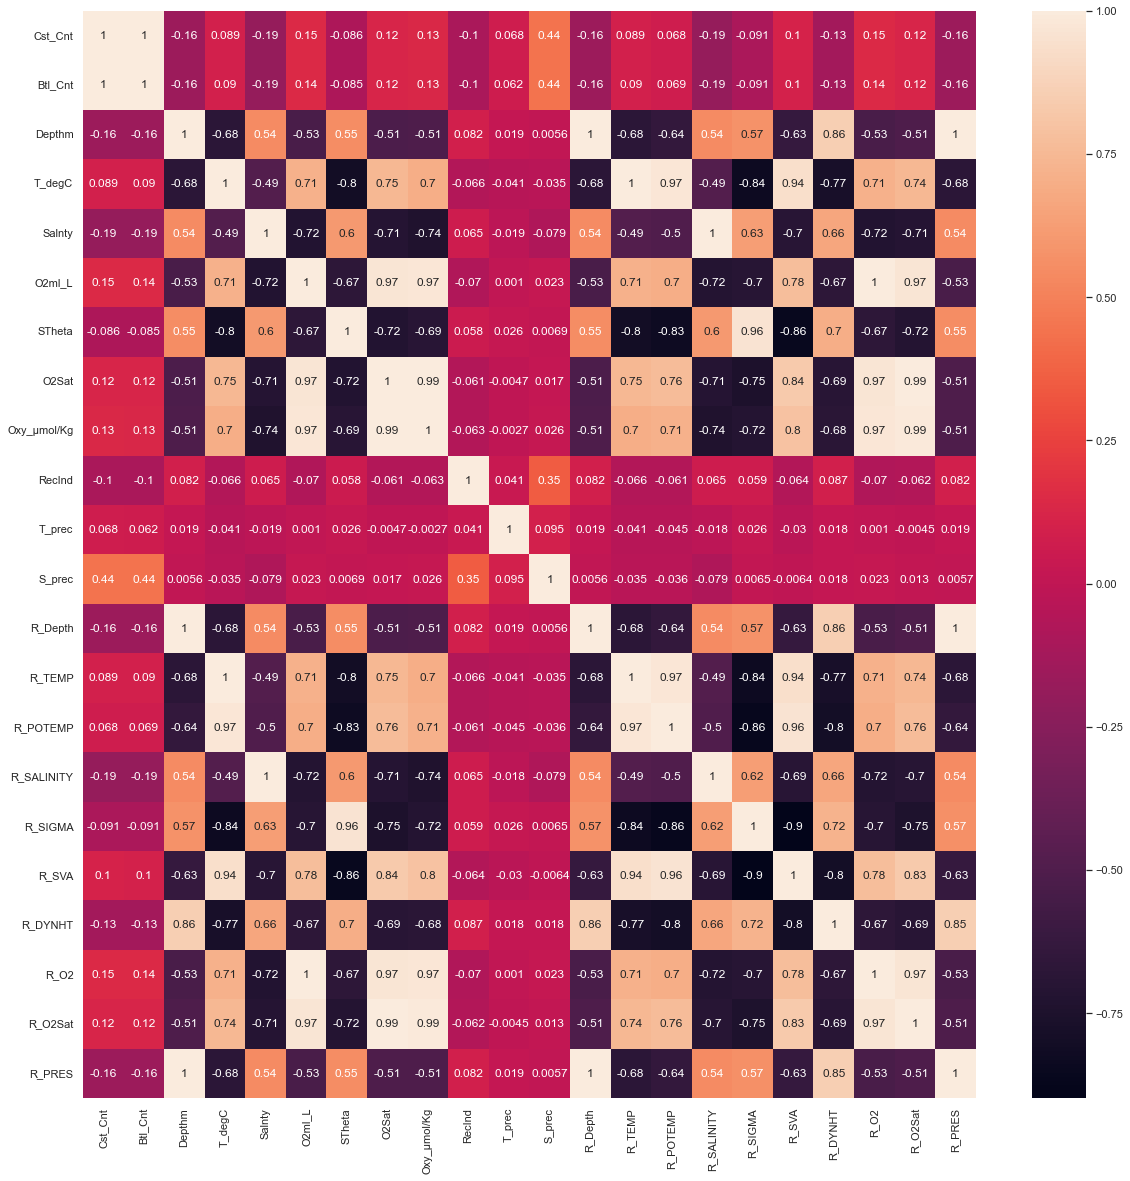

In [210]:
corrMatrix = corrMatrix_df.corr()

sns.set(rc = {'figure.figsize':(20,20)})

dataplot = sns.heatmap(corrMatrix, cmap="rocket", annot=True)

#YlGnBu

As the water temperature goes up the reported temperatures goes up the exact amount-there is perfect positive correlation there.  This may be because each water temperature gets reported in the dataset.
The reported water temperature has a pretty high postive relationship with potential temperature. This may be because the predicted or potential temperature increases around the same rate as the actual water temperature. 

As the water temperature goes up, so does the Reported Specific Volume Anomaly but not at the same rate. 

Another notable observation about water temperature is, as it goes up the reported milliliters of oxygen per liter of seawater goes down--there is a pretty high negative correlation there. This is also true for reported dynamic height.

Both Reported Potential Density of water and Potential Density of Water goes down at a similar rate as water temperature increases. 


3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [246]:
LR_df = corrMatrix_df[['T_degC','Salnty']]

# The feature array X 
# The target variable array y 

# test_size: what portion of our original data is used for the test set?
    #By default the funciton splits the data into 75% training data and 25% test data.

# training data: X_train
# test data: X_test-->verify how well model works
# training labels: y_train
# test labels: y_test

#TRAIN-TEST-SPLIT FUNCTION: randomly split our data 


# Stratify: The labels should be distributed in train and test sets as they are in the original dataset. 
    # Stratify equals y, where y is the list or array containing the labels.

X = np.array(LR_df['Salnty']).reshape(-1,1) #reshape: makes it one-dimensional
y = np.array(LR_df['T_degC']).reshape(-1,1) #Water temperature is what needs to be predicted
print(X.shape, y.shape)

#1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 40)

(864863, 1) (864863, 1)


In [238]:
#2. create the model (Create the regressor)
regression_df = LinearRegression()

# training data: X_train
# training labels: y_train
regression_df.fit(X_train, y_train) #Fit the regressor to the training data

LinearRegression()

In [239]:
#3. predict new values
y_pred = regression_df.predict(X_test) 
y_pred

array([[10.80127292],
       [ 9.38986541],
       [11.10666146],
       ...,
       [11.46566974],
       [11.38282168],
       [ 7.81114948]])

4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 



In [241]:
#r squared
accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

0.23968148875290185


In [242]:
r2_score(y_test, y_pred)

0.23968148875290185

In [243]:
#i thought mean squared error and r2 were the same. 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.675788625869084


5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

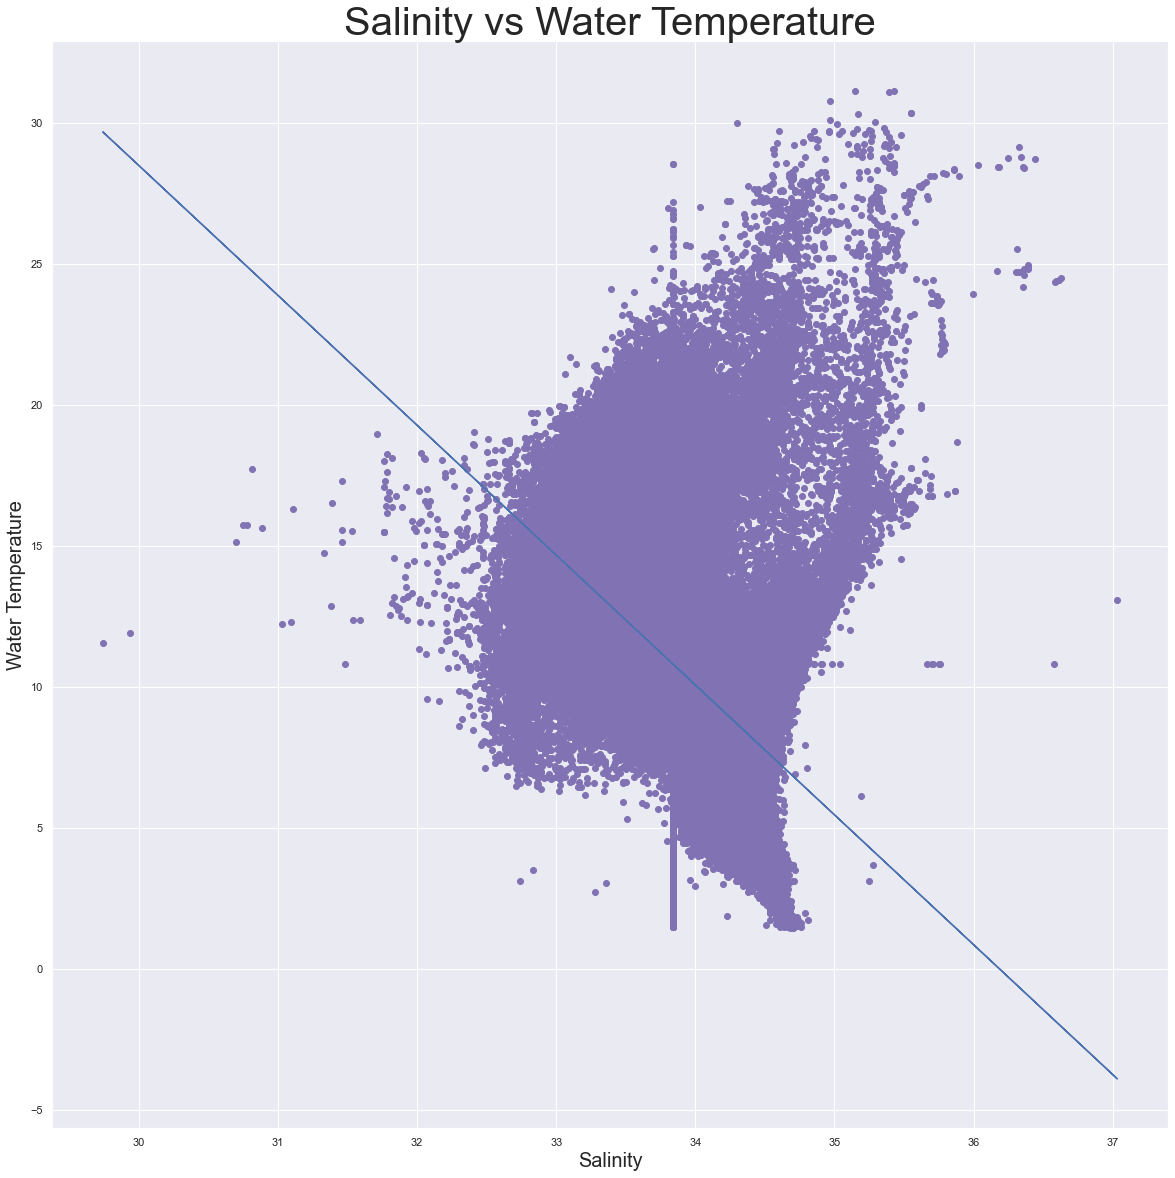

In [251]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='b')

plt.xlabel("Salinity", size=20)
plt.ylabel("Water Temperature", size=20)

# Set the title
plt.title("Salinity vs Water Temperature", size=40)

plt.show()

6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 